In [2]:
import pandas as pd
import numpy as np

In [3]:
seasons = list(range(2009,2019)) # creates list of years through 2018

In [4]:
# merge seasons into one complete df
df = pd.DataFrame()
for season in seasons:
    path = './data/nflscrapR-data/play_by_play_data/regular_season/reg_pbp_'+str(season)+'.csv'
    season_df = pd.read_csv(path)
    df = pd.concat([df, season_df], axis=0)
    path = './data/nflscrapR-data/play_by_play_data/post_season/post_pbp_'+str(season)+'.csv'
    post_season_df = pd.read_csv(path)
    df = pd.concat([df, post_season_df], axis=0)

print(df.shape)

print(df['play_type'].unique())


/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (42,166,167,174,175,178,179,182,183,188,189,190,191,203,204,205,231,232,233,238,240,241) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (166,167,168,169,174,175,178,179,182,183,188,189,190,191,194,195,203,204,205,218,219,220,231,232,233,238,240,241,249) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (37,38,39,42,46,47,166,167,168,169,172,173,174,175,176,177,178,179,182,183,184,185,188,189,190,191,192,193,194,195,198,199,203,204,205,224,225,226,227,231,232,233,238,240,241,244,245,246,250) have mixed types. Speci

(473782, 256)
['kickoff' 'pass' 'run' 'punt' 'field_goal' 'no_play' nan 'extra_point'
 'qb_kneel' 'qb_spike']


In [5]:
print(df['play_type'].unique())

df.desc = df.desc.fillna("") # fill nans so can index

['kickoff' 'pass' 'run' 'punt' 'field_goal' 'no_play' nan 'extra_point'
 'qb_kneel' 'qb_spike']


In [11]:
punts = df.loc[df.desc.str.contains('punt|Punt')]
print(len(punts))
fake_punts = punts.loc[(punts['play_type']=='run')|(punts['play_type']=='pass')]
fake_punts = fake_punts.loc[fake_punts.penalty!=1] # drop enforced penalties
fake_punts = fake_punts.loc[~fake_punts.desc.str.contains('Penalty')] # drop non enforced penalties
fake_punts = fake_punts.loc[~fake_punts.desc.str.contains('Aborted|Shotgun')] # drop punter mishandles snap
fake_punts = fake_punts.loc[~fake_punts.desc.str.contains('SAFETY')] # punter intentionally runs out of end zone (not likely to fake a punt in own redzone)
fake_punts.dropna(subset=['desc'], inplace=True) # drop plays without description

print(len(fake_punts))

26498
177


In [12]:
for index,row in fake_punts.iterrows():
    print(row['desc'])

(13:34) M.Schaub pass incomplete short left to A.Davis. (The punt hangtime was 3.4 seconds)
(12:43) (Punt formation) G.Wolfe up the middle to CHI 30 for 4 yards (B.Swain, D.Bishop). Chicago challenged the too many players on field ruling, and the play was Upheld. (Timeout #2 at 12:39.)
(6:43) Direct snap to #47 J. McGraw (Punt formation) J.McGraw left end to KC 44 for 4 yards (E.Buckley).
(1:32) (Punt formation) C.Crocker left end to PIT 41 for 21 yards (L.Sweed, J.Burnett).
(5:40) (Punt formation) S.Weatherford right end ran ob at MIA 40 for 26 yards.
(4:58) (Punt formation) B.Smith right end to MIA 28 for 12 yards (Y.Bell).
(6:23) (Punt formation) J.Ryan pass deep middle to J.Carlson to ARI 20 for 42 yards (M.Adams).
(:34) (Punt formation) S.Weatherford up the middle to NYJ 39 for 16 yards (I.Ekejiuba).
(12:27) (Punt formation) J.Jenkins left tackle to BUF 37 for -3 yards (J.Casey). End-around, handoff from B.Moorman.
(14:08) (Punt formation) B.Croyle pass incomplete short left to T.

In [15]:
nfake_punts = punts.loc[punts['play_type']=='punt']
nfake_punts = nfake_punts.loc[nfake_punts.penalty!=1] # drop enforced penalties
nfake_punts = nfake_punts.loc[~nfake_punts.desc.str.contains('Penalty')] # drop non enforced penalties
nfake_punts = nfake_punts.loc[~nfake_punts.desc.str.contains('Aborted|Shotgun')] # drop punter mishandles snap
nfake_punts = nfake_punts.loc[~nfake_punts.desc.str.contains('SAFETY')] # punter intentionally runs out of end zone (not likely to fake a punt in own redzone)
nfake_punts.dropna(subset=['desc'], inplace=True) # drop plays without description
print(len(nfake_punts))


22245


In [57]:
print(nfake_punts.epa.mean())
print(nfake_punts.epa.std())
print(fake_punts.epa.mean())
print(fake_punts.epa.std())

-0.019032391359672038
1.166061155690891
1.3693976255153082
3.1756931966781585


In [58]:
for index, row in fake_punts.iterrows():
    print(row['desc'])

(13:34) M.Schaub pass incomplete short left to A.Davis. (The punt hangtime was 3.4 seconds)
(12:43) (Punt formation) G.Wolfe up the middle to CHI 30 for 4 yards (B.Swain, D.Bishop). Chicago challenged the too many players on field ruling, and the play was Upheld. (Timeout #2 at 12:39.)
(6:43) Direct snap to #47 J. McGraw (Punt formation) J.McGraw left end to KC 44 for 4 yards (E.Buckley).
(1:32) (Punt formation) C.Crocker left end to PIT 41 for 21 yards (L.Sweed, J.Burnett).
(5:40) (Punt formation) S.Weatherford right end ran ob at MIA 40 for 26 yards.
(4:58) (Punt formation) B.Smith right end to MIA 28 for 12 yards (Y.Bell).
(6:23) (Punt formation) J.Ryan pass deep middle to J.Carlson to ARI 20 for 42 yards (M.Adams).
(:34) (Punt formation) S.Weatherford up the middle to NYJ 39 for 16 yards (I.Ekejiuba).
(12:27) (Punt formation) J.Jenkins left tackle to BUF 37 for -3 yards (J.Casey). End-around, handoff from B.Moorman.
(14:08) (Punt formation) B.Croyle pass incomplete short left to T.

In [56]:
print("Average Win Prob at time of punt attempt: 0.462")
print("Average Win Prob at time of fake punt attempt: 0.398")
print("")
print("Average Win Prob at time of field goal attempt: 0.578")
print("Average Win Prob at time of fake field goal attempt: 0.561")
print("")
print("Average Win Prob at time of run attempt: 0.559")
print("Average Win Prob at time of trick run attempt: 0.534")
print("")
print("Average Win Prob at time of pass attempt: 0.490")
print("Average Win Prob at time of trick pass attempt: 0.557")

Average Win Prob at time of punt attempt: 0.462
Average Win Prob at time of fake punt attempt: 0.398

Average Win Prob at time of field goal attempt: 0.578
Average Win Prob at time of fake field goal attempt: 0.561

Average Win Prob at time of run attempt: 0.559
Average Win Prob at time of trick run attempt: 0.534

Average Win Prob at time of pass attempt: 0.490
Average Win Prob at time of trick pass attempt: 0.557


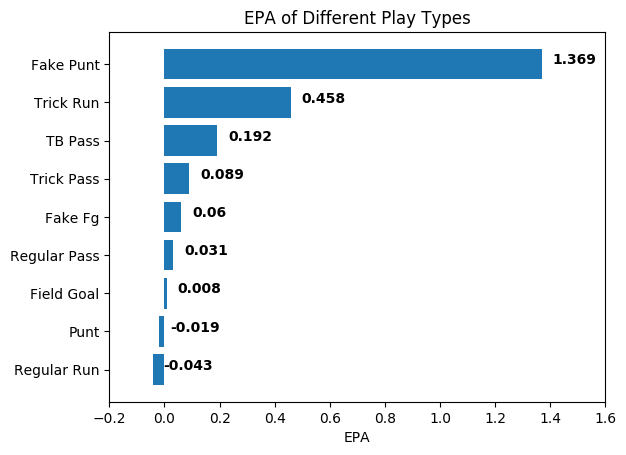

In [52]:
import matplotlib.pyplot as plt

plt.rcdefaults()
fig, ax = plt.subplots()

play_types = ('Fake Punt','Trick Run','TB Pass','Trick Pass','Fake Fg','Regular Pass', 'Field Goal', 'Punt', 'Regular Run')
y_pos = np.arange(len(play_types))
performance = [1.369,0.458,0.192,.089,.060,0.031,.008,-0.019,-0.043]
error = []

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(play_types)
ax.set_xticks([-0.2,0,0.2,0.4,0.6,0.8,1,1.2,1.4,1.6])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('EPA')
ax.set_title('EPA of Different Play Types')

for i, v in enumerate(performance):
    ax.text(v + 0.04, i, str(v), color='black', fontweight='bold')

plt.show()


In [43]:
fg = df.loc[df.play_type=='field_goal']
fg = fg.loc[~fg.desc.str.contains('TWO POINT ATTEMPT|TWO-POINT CONVERSION ATTEMPT')]
fg = fg.loc[fg.penalty!=1] # drop enforced penalties
fg = fg.loc[~fg.desc.str.contains('Aborted|Shotgun|PENALTY|Penalty|punts|FUMBLES')]

In [39]:
fgf = df.loc[df.desc.str.contains('Field Goal formation|Kick formation')]
print(len(fgf))
fgf = fgf.loc[(fgf.play_type=='run')|(fgf.play_type=='pass')]
fgf = fgf.loc[~fgf.desc.str.contains('TWO POINT ATTEMPT|TWO-POINT CONVERSION ATTEMPT')]
fgf = fgf.loc[fgf.penalty!=1] # drop enforced penalties
fgf = fgf.loc[~fgf.desc.str.contains('Aborted|Shotgun|PENALTY|Penalty|punts|FUMBLES')]
fgf.dropna(subset=['desc'], inplace=True)
print(len(fgf))

3319
44


In [41]:
for index,row in fgf.iterrows():
    print(row['desc'])

(:33) (Field Goal formation) H.Smith right end for 8 yards, TOUCHDOWN.
(14:56) (Field Goal formation) B.Moorman pass deep left to R.Denney for 25 yards, TOUCHDOWN. Caught along sideline at NO 6.
(11:09) (Field Goal formation) S.Weatherford pass short middle intended for B.Hartsock INTERCEPTED by J.Wendling at BUF 35. J.Wendling to BUF 35 for no gain (S.Pouha).
(1:03) (Field Goal formation) Josh.Brown pass short left to D.Fells for 36 yards, TOUCHDOWN. DET-C.Avril was injured during the play. His return is Questionable.  Fake filed goal 5 lateraled to 3
(:13) (Field Goal formation) P.Dawson pass short right to M.Furrey to DET 11 for 10 yards (L.Delmas).
(7:35) (Field Goal formation) B.Maynard pass short middle to G.Olsen to STL 10 for no gain (D.Roach).
(2:11) (Field Goal formation) M.Brunell pass incomplete short left to D.Dinkins.
(:02) (Field Goal formation) H.Smith pass short left INTERCEPTED by A.Rouse at NYG 6. A.Rouse to WAS 45 for 49 yards (K.Golston). Offense started in field g

In [54]:
print(fg.wp.mean())
print(fg.epa.std())
print(fgf.wp.mean())
print(fgf.epa.std())

0.5784041329327774
1.5531475240347015
0.5611945524880042
3.4195664710617413
